## Introduction 

This notebook explores Data Analysis practices including data exploration using ```Python``` libraries such as ```Python``` & ```Numpy```, as well as data visualization using ```matplotlib``` and ```seaborn``` in order to produce important insights from the UFC Fight Historical Data Dataset. 

## About the Dataset  

Dataset: [UFC Fights - Historical Data from 1993 to 2019](https://www.kaggle.com/rajeevw/ufcdata)

Files: matches.csv, fighters.csv

## Approach

**A. Data Exloration**

**B. Data Analysis**

- _Target Audience_ : Viewers who bet regularly + might need insights to have the best odd.
- _Target Question_ : Given any two fighters, what insights can we make use of to best predict the winner of that particular match?
- _Approach_ : We will explore **5 Categorical** Features & **12 Continuous** Features to answer our Question. 

<font color = grey> **Categorical Data:</font>** 
1. _'Winner'_ : Red or Blue
2. _'Date'_ : Popularity by Year
3. _'Weight Class'_ ∝ Win Rate
4. _'Age'_ ∝ Win Rate
5. _'Location'_ ∝ Win Rate

<font color = grey> **Continuous Data: </font>** 
Explore top 5 most positively & negatively correlated technical stats to Win Rate. 

## Presentation 
Please click [here](https://datastudio.google.com/u/0/reporting/ec97879f-3b24-45ba-a82c-cb679fd6b9a6/page/Rtl7) for our **Google Data Studio** report.

# <font color = grey> Data Exploration - Import Libraries & Dataset </font>

In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import Dataset
matches = pd.read_csv('/content/matches.csv')
fighters = pd.read_csv('/content/fighters.csv')

In [0]:
# matches 
print('There are' , (matches.shape[0]), 'rows in this dataframe.')
print('There are' , (matches.shape[1]), 'columns in this dataframe.')

matches.sample(1)

There are 5144 rows in this dataframe.
There are 145 columns in this dataframe.


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,...,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
3806,Kevin Ferguson,Matt Mitrione,Dan Miragliotta,2010-05-08,"Montreal, Quebec, Canada",Blue,False,Heavyweight,3,0.0,1.0,0.0,4.0,4.0,10.0,6.0,20.0,5.0,4.0,3.0,25.0,6.0,1.0,5.0,4.0,0.0,0.0,34.0,14.0,0.41,0.0,0.0,0.0,0.0,37.0,17.0,1.0,0.0,2.0,1.0,...,0.0,0.0,8.0,1.0,68.0,40.0,3.0,2.0,35.0,11.0,0.0,44.0,32.0,0.0,0.0,79.0,43.0,0.54,0.0,0.0,0.0,0.0,98.0,61.0,3.0,900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Orthodox,187.96,NaN,235.0,31.0,36.0


In [0]:
# fighters 
print('There are' , (fighters.shape[0]), 'rows in this dataframe.')
print('There are' , (fighters.shape[1]), 'columns in this dataframe.')

fighters.sample(1)

There are 3313 rows in this dataframe.
There are 6 columns in this dataframe.


,fighter_name,Height,Weight,Reach,Stance,DOB
1974,Lemont Davis,"5' 8""",170 lbs.,NaN,Orthodox,NaN


# <font color = grey> Data Exploration - Explore Data Structure </font>

In [0]:
# print(type(matches.isnull().sum()))
# print(matches.isnull().sum().shape)

columnsnull = matches.isnull().sum()
lstcolumnnull = columnsnull[columnsnull.values != 0].index.tolist()

print ('There are', len(lstcolumnnull), 'columns with missing values.')
print ('The percentage of columns with missing values is', 
       columnsnull[columnsnull.values != 0].count() / matches.shape[1] * 100, 
        '%')

There are 109 columns with missing values.
The percentage of columns with missing values is 75.17241379310344 %


In [0]:
rowsnull = matches[matches.isnull().any(axis = 1)]

print ('There are' , len(matches[matches.isnull().any(axis = 1)]) , 'rows with missing values.')
print ('The percentage of rows with missing values is', 
       len(rowsnull) / matches.shape[0] * 100, 
       '%')

There are 1942 rows with missing values.
The percentage of rows with missing values is 37.75272161741835 %


Due to the sheer amount of columns (145 in total and 109 containing null values), we decided to separate our dataset into two tables containing information for <font color = red> Red </font> & <font color = blue> Blue </font> separately + non-color-specific columns such as <font color = grey> 'Referee', 'date', location', 'Winner', 'title_bout', 'weight_class, and 'no_of_rounds'.</font>

In [0]:
red = matches.drop(['B_fighter','B_current_lose_streak','B_current_win_streak','B_draw','B_avg_BODY_att','B_avg_BODY_landed','B_avg_CLINCH_att','B_avg_CLINCH_landed','B_avg_DISTANCE_att','B_avg_DISTANCE_landed','B_avg_GROUND_att','B_avg_GROUND_landed','B_avg_HEAD_att','B_avg_HEAD_landed','B_avg_KD','B_avg_LEG_att','B_avg_LEG_landed','B_avg_PASS','B_avg_REV','B_avg_SIG_STR_att','B_avg_SIG_STR_landed','B_avg_SIG_STR_pct','B_avg_SUB_ATT','B_avg_TD_att','B_avg_TD_landed','B_avg_TD_pct','B_avg_TOTAL_STR_att','B_avg_TOTAL_STR_landed','B_longest_win_streak','B_losses','B_avg_opp_BODY_att','B_avg_opp_BODY_landed','B_avg_opp_CLINCH_att','B_avg_opp_CLINCH_landed','B_avg_opp_DISTANCE_att','B_avg_opp_DISTANCE_landed','B_avg_opp_GROUND_att','B_avg_opp_GROUND_landed','B_avg_opp_HEAD_att','B_avg_opp_HEAD_landed','B_avg_opp_KD','B_avg_opp_LEG_att','B_avg_opp_LEG_landed','B_avg_opp_PASS','B_avg_opp_REV','B_avg_opp_SIG_STR_att','B_avg_opp_SIG_STR_landed','B_avg_opp_SIG_STR_pct','B_avg_opp_SUB_ATT','B_avg_opp_TD_att','B_avg_opp_TD_landed','B_avg_opp_TD_pct','B_avg_opp_TOTAL_STR_att','B_avg_opp_TOTAL_STR_landed','B_total_rounds_fought','B_total_time_fought(seconds)','B_total_title_bouts','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage','B_wins','B_Stance','B_Height_cms','B_Reach_cms','B_Weight_lbs','B_age'], axis = 1)
print(red.shape)
red.sample()

(5144, 76)


,R_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age
3806,Kevin Ferguson,Dan Miragliotta,2010-05-08,"Montreal, Quebec, Canada",Blue,False,Heavyweight,3,0.0,1.0,0.0,4.0,4.0,9.0,4.0,46.0,12.0,11.0,11.0,62.0,23.0,0.0,0.0,0.0,5.0,0.0,66.0,27.0,0.4,1.0,4.0,4.0,1.0,76.0,36.0,1.0,0.0,0.0,0.0,8.0,1.0,68.0,40.0,3.0,2.0,35.0,11.0,0.0,44.0,32.0,0.0,0.0,79.0,43.0,0.54,0.0,0.0,0.0,0.0,98.0,61.0,3.0,900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Orthodox,187.96,NaN,235.0,36.0


In [0]:
blue = matches.drop(['R_fighter','R_current_lose_streak','R_current_win_streak','R_draw','R_avg_BODY_att','R_avg_BODY_landed','R_avg_CLINCH_att','R_avg_CLINCH_landed','R_avg_DISTANCE_att','R_avg_DISTANCE_landed','R_avg_GROUND_att','R_avg_GROUND_landed','R_avg_HEAD_att','R_avg_HEAD_landed','R_avg_KD','R_avg_LEG_att','R_avg_LEG_landed','R_avg_PASS','R_avg_REV','R_avg_SIG_STR_att','R_avg_SIG_STR_landed','R_avg_SIG_STR_pct','R_avg_SUB_ATT','R_avg_TD_att','R_avg_TD_landed','R_avg_TD_pct','R_avg_TOTAL_STR_att','R_avg_TOTAL_STR_landed','R_longest_win_streak','R_losses','R_avg_opp_BODY_att','R_avg_opp_BODY_landed','R_avg_opp_CLINCH_att','R_avg_opp_CLINCH_landed','R_avg_opp_DISTANCE_att','R_avg_opp_DISTANCE_landed','R_avg_opp_GROUND_att','R_avg_opp_GROUND_landed','R_avg_opp_HEAD_att','R_avg_opp_HEAD_landed','R_avg_opp_KD','R_avg_opp_LEG_att','R_avg_opp_LEG_landed','R_avg_opp_PASS','R_avg_opp_REV','R_avg_opp_SIG_STR_att','R_avg_opp_SIG_STR_landed','R_avg_opp_SIG_STR_pct','R_avg_opp_SUB_ATT','R_avg_opp_TD_att','R_avg_opp_TD_landed','R_avg_opp_TD_pct','R_avg_opp_TOTAL_STR_att','R_avg_opp_TOTAL_STR_landed','R_total_rounds_fought','R_total_time_fought(seconds)','R_total_title_bouts','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage','R_wins','R_Stance','R_Height_cms','R_Reach_cms','R_Weight_lbs','R_age'], axis = 1)
print(blue.shape)
blue.sample()

(5144, 76)


,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age
315,Luis Pena,Keith Peterson,2018-11-10,"Denver, Colorado, USA",Red,False,Lightweight,3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,20.0,8.0,2.0,0.0,22.0,8.0,1.0,0.0,0.0,1.0,1.0,23.0,8.0,0.34,1.0,1.0,1.0,1.0,23.0,8.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,3.0,4.0,4.0,5.0,3.0,0.0,3.0,3.0,1.0,0.0,9.0,7.0,0.77,0.0,3.0,2.0,0.66,17.0,15.0,1.0,212.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Southpaw,190.5,190.5,155.0,25.0


In [0]:
# <font color = grey> Data Exploration - Explore Data Structure </font>

# <font color = grey> Data Analysis - Categorical Data </font>

### 1. <font color = red> Red </font> & <font color = blue> Blue </font> as Winner 

First, we take a look at the **'Winner'** column. There are three classes in this columns: 'Red', 'Blue' and 'Draw'. 

In [0]:
winner = matches['Winner'].value_counts()
winner

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64

Next, we visualize the **percentage** of winner from each class using a [**pie chart**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html). 

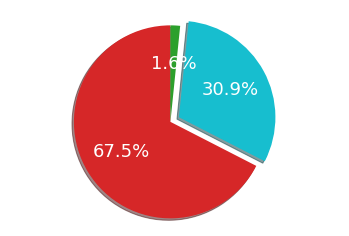

In [0]:
text_style = {'color': 'white' , 'size' : 18}

fig1, ax1 = plt.subplots()

ax1.pie((winner[0], winner[1], winner[2]), 
        explode = (0, 0.1, 0), 
        labels = ('Red', 'Blue', 'Draw'), 
        colors = ('tab:red','tab:cyan','tab:green') , autopct='%1.1f%%',
        shadow = True, startangle = 90,
        textprops = text_style)

ax1.axis('equal') 

plt.show()

### <font color = gray> Observations </font>

**Win Percentage**
<br><font color = red> **Red** </font></br> 67.5% 
<br><font color = blue> **Blue**</font></br> 30.9% 
<br>**Draw** 1.6% </br>

Possible explanation: 
Most of the time, the <font color = red>**red**</font> corner houses the champion or the higher ranked fighter.


### 2. <font color = red> Popularity </font> by <font color = blue> Year </font>

We visualize the number of matches in each year between 1993 - 2019 using a [bar chart](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)

<BarContainer object of 27 artists>

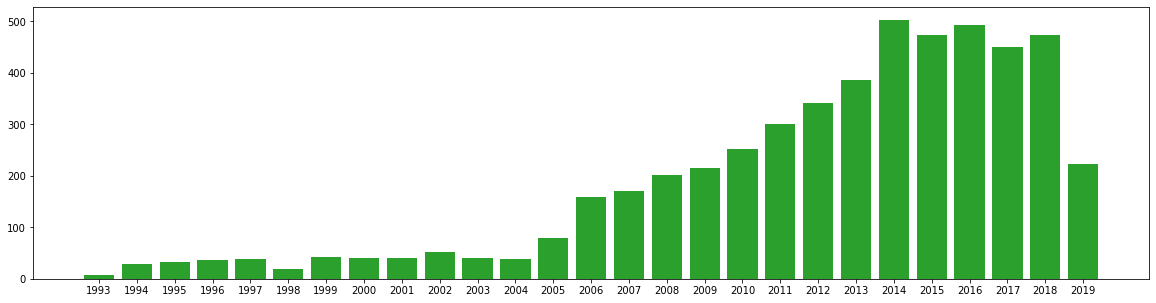

In [0]:
plt.figure(figsize = (20,5))

year = []
for match in matches['date']:

    match = match.split('-')[0]
    year.append(match)
               
myear = pd.Series(year).value_counts().sort_index(ascending = True)

plt.bar(x = myear.index, 
        height = myear.values, color = 'tab:green')

### <font color = gray> Observations </font>

- The UFC began in 1993. Its popularity started increasing slowly from 2006 and peaked in 2014.
- In 2019, the number of matches is low due to incomplete data. 

###  3. <font color = red> Weight Class </font> and <font color = blue> Win Rate </font>

We will explore how players win in each weight class i.e. whethere Red or Blue fighters win more or less in each weight class.

We start by looking into the weight_class column & counting the number of matches in each weight class. Then, we create bar plots 

In [0]:
mweightclass = matches['weight_class'].value_counts()
print('There are' , mweightclass.count(), 'weight classes in the UFC.')
mweightclass

There are 14 weight classes in the UFC.


Lightweight              989
Welterweight             969
Middleweight             725
Heavyweight              507
Light Heavyweight        502
Featherweight            442
Bantamweight             379
Flyweight                187
Women's Strawweight      143
Women's Bantamweight     111
Open Weight               92
Women's Flyweight         50
Catch Weight              38
Women's Featherweight     10
Name: weight_class, dtype: int64

In [0]:
mlist = mweightclass.index.tolist()

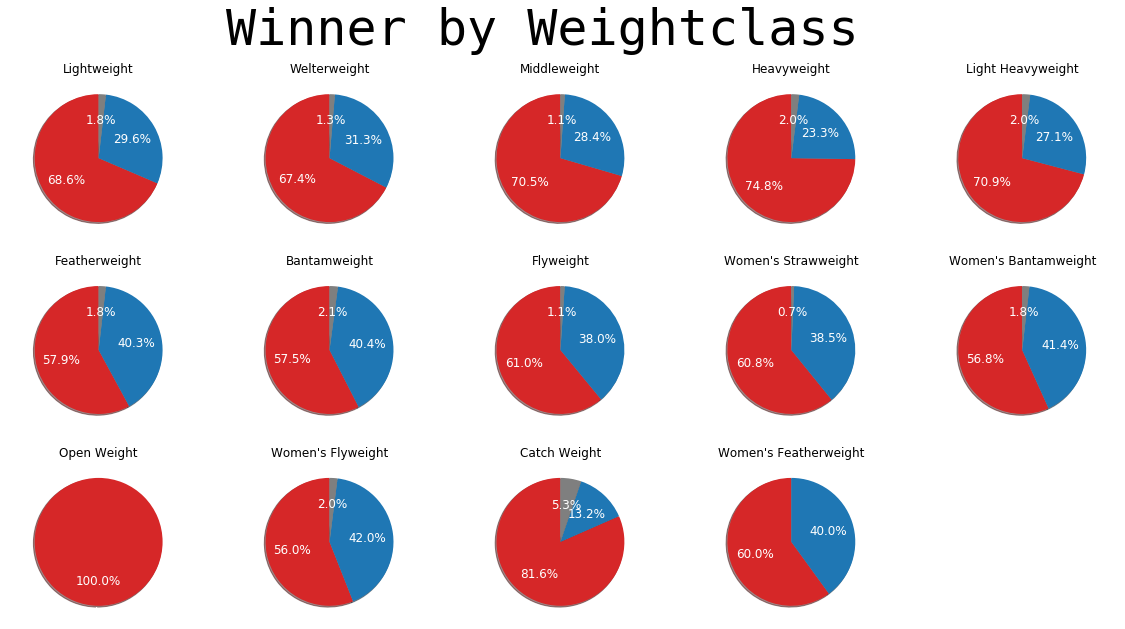

In [0]:
plt.figure(figsize = (20,10))
plt.suptitle('Winner by Weightclass', size = 50, color = 'black', family = 'monospace')

for i, j in zip(range(1,15), mlist):

    plt.subplot(3,5,i)

    a = matches[matches['weight_class'] == j]['Winner'].value_counts()

    labels = a.index.tolist()
    x = a.values

    text_style = {'color': 'white' , 'size' : 12}
    plt.pie(x = x, labels = labels, colors = ['tab:red', 'tab:blue', 'tab:gray'],
           autopct = '%1.1f%%', shadow = True, startangle = 90, textprops = text_style)
    
    plt.title(j)

### <font color = gray> Observations </font>

- Across all 14 weight classes, <font color = red> Red </font> almost always wins more than <font color = blue> Blue </font> does. 
- Outlier: Open Weight with **Winner** being <font color = red> Red </font> **100%** of the time. 

### 4. <font color = red> Age </font> and <font color = blue> Win Rate </font>

<BarContainer object of 26 artists>

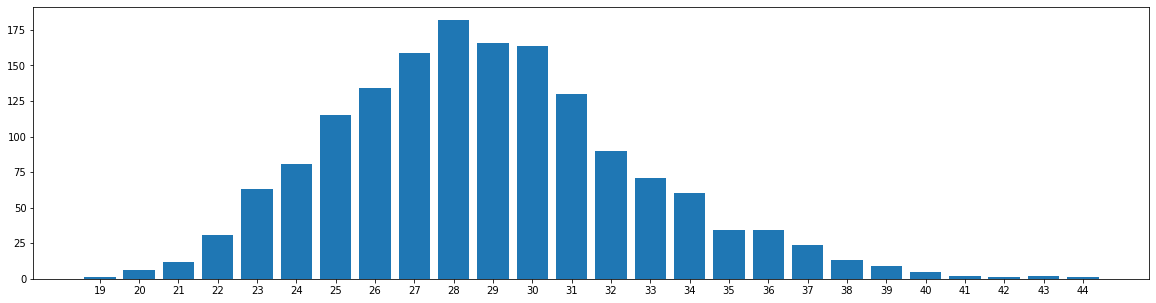

In [0]:
bluewins_age = matches[matches['Winner'] == "Blue"]['B_age'].value_counts()

plt.figure(figsize = (20,5))
plt.xticks(bluewins_age.index.to_numpy())
plt.bar(x = bluewins_age.index, height = bluewins_age.values, 
        color = 'tab:blue', align = 'center')

<BarContainer object of 29 artists>

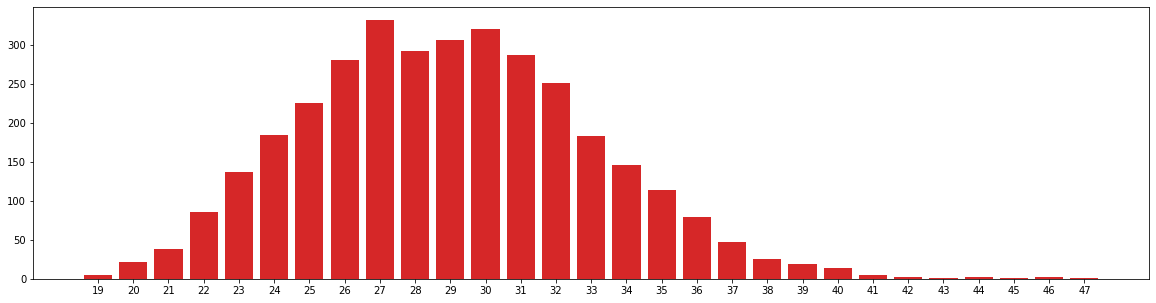

In [0]:
redwins_age = matches[matches['Winner'] == "Red"]['R_age'].value_counts()

plt.figure(figsize = (20,5))
plt.xticks(redwins_age.index.to_numpy())
plt.bar(x = redwins_age.index, height = redwins_age.values, 
        color = 'tab:red', align = 'center')

### <font color = gray> Observations </font>

The prime age range to be successful as a UFC fighter is between 26 to 31. This is true for both experienced fighters <font color = red> (Red) </font> and novice fighters <font color = blue> (Blue) </font>.

### 5. <font color = red> Locations </font> and <font color = blue> Win Rate </font>

In [0]:
print ('There are', len(matches['location'].unique()), 'worldwide locations where UFC fights take place.')

There are 157 worldwide locations where UFC fights take place.


<BarContainer object of 20 artists>

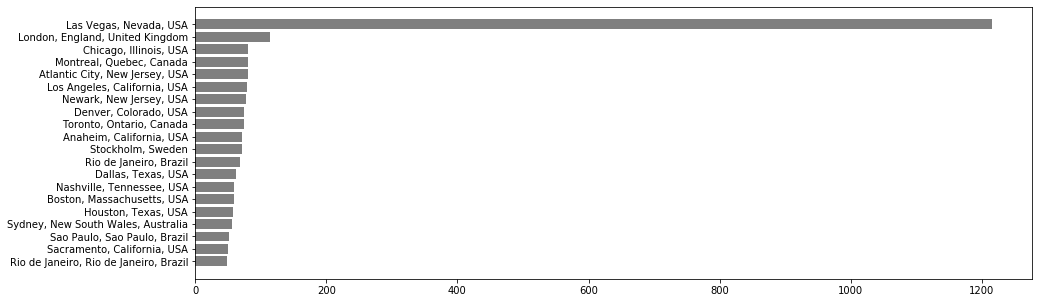

In [0]:
#top 5 most popular locations

x = matches['location'].value_counts().sort_values(ascending = False)[:20].index[::-1]
height = matches['location'].value_counts().sort_values(ascending = False)[:20].values[::-1]

plt.figure (figsize = (15,5))
plt.barh(y = x, width = height, color = 'tab:gray')

<BarContainer object of 20 artists>

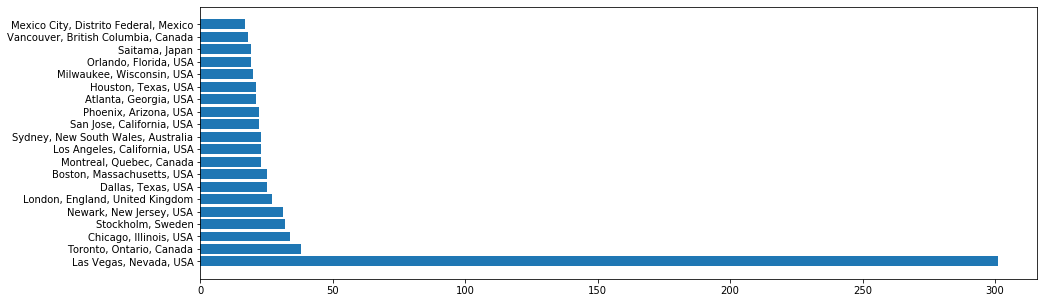

In [0]:
# where Blue wins the most 

bluewins_location = matches[matches['Winner'] == "Blue"]['location'].value_counts().sort_values(ascending = False)
bluewins_location

plt.figure (figsize = (15,5))
plt.barh(y = bluewins_location[:20].index, width = bluewins_location[:20].values, color = 'tab:blue')

<BarContainer object of 20 artists>

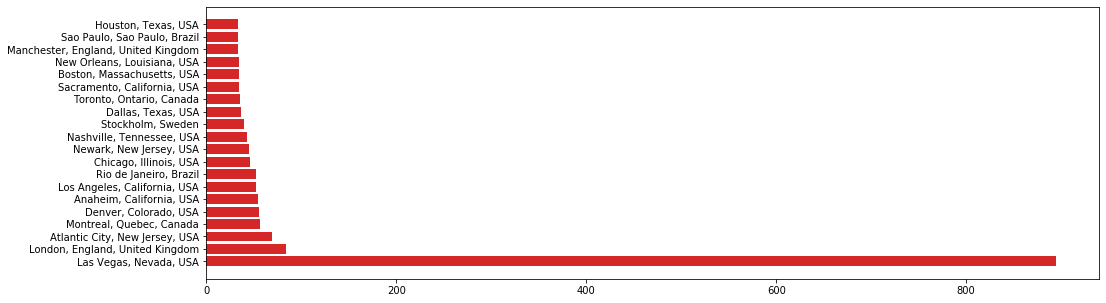

In [0]:
# where Red wins the most

redwins_location = matches[matches['Winner'] == "Red"]['location'].value_counts().sort_values(ascending = False)
redwins_location

plt.figure (figsize = (16,5))
plt.barh(y = redwins_location[:20].index, width = redwins_location[:20].values, color = 'tab:red')

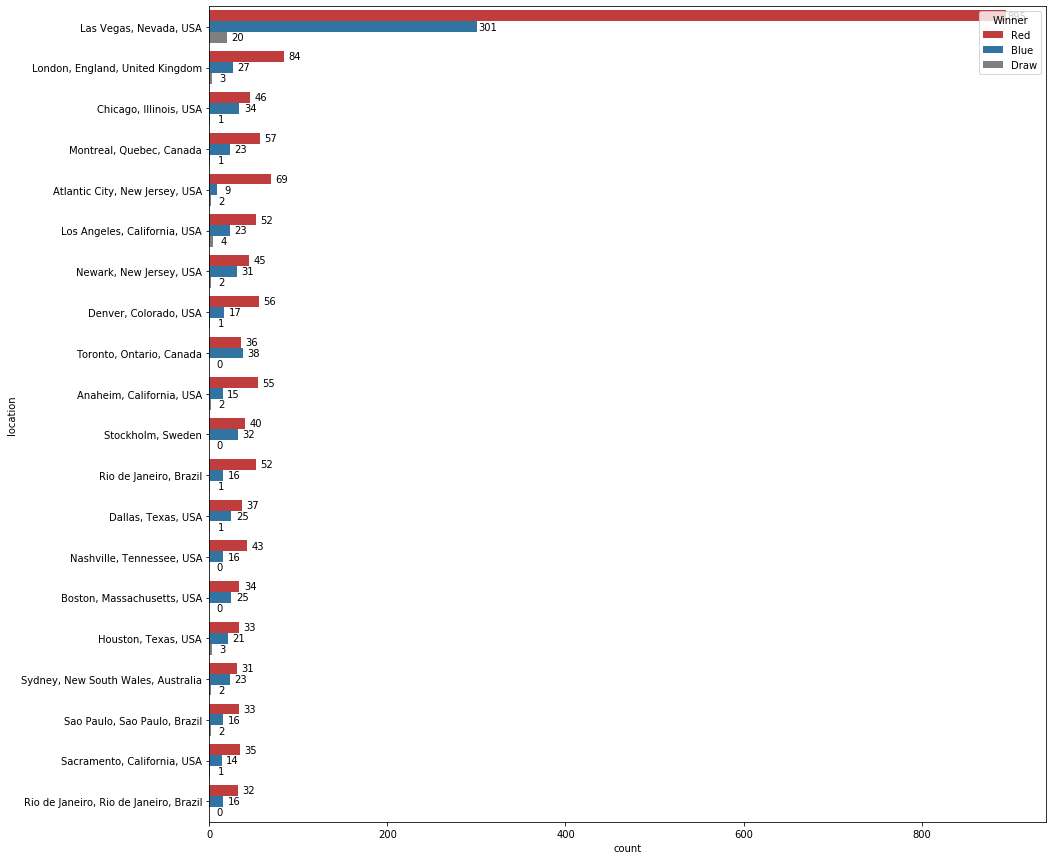

In [0]:
locations5 = matches['location'].value_counts().sort_values(ascending = False)[:20].index

locations5_df = matches[matches['location'].isin(locations5)]


plt.figure(figsize=(15,15))
sns.countplot(data = locations5_df, y = 'location', hue = 'Winner', 
              order = locations5, palette = ['tab:red', 'tab:blue', 'tab:gray'], orient = 'h')


ax = plt.gca()

# print(ax.patches[1].get_height())

for p in ax.patches:
    
    try:
        x = int(p.get_width())
    
    except:
        x = 0
        
#     print(label)
        
#     print(p.get_width())
    ax.text(x = x + 12 , y = p.get_y() + p.get_height()/2, 
            s = x, ha = 'center', va = 'center')

In [0]:
# percentage top 20 locations / all locations 
perc = matches['location'].value_counts().sort_values(ascending = False)[:20].values.sum() / matches['location'].value_counts().sort_values(ascending = False).values.sum()
perc_string = str(round(perc*100,2))+'%'
perc_string

'49.24%'

### <font color = gray> Observations </font>

- In the top 20 locations where 49.24% of fights occur, we can observe that <font color = red> Red </font> wins over <font color = blue> Blue </font> most of the time. Toronto, Ontario, Canada is an exception, where <font color = blue> Blue </font> wins over <font color = red> Red </font> in absolute terms. 
- The discrepancy between the locations may vary. In Las Vegas, for instance, Red wins over Blue more than 60% of the time. The difference is not as clear for some other locations, such as Stockholm, Sweden (R: 40, B: 32).

# <font color = grey> Continuous Data </font>

As explained above, we will select the top 5 most positively corelated technical statistics to 'Winner' (i.e. the higher these stats are, the more likely the Red or Blue winner wins the match) as well as the top 5 most negatively corelated technical stats which tells the opposite (i.e. the lower these stats are, the more likely the Red or Blue winner would win. 

We will use the DataFrames ```red``` and ```blue``` created above.

We begin by replacing string values ('Red', 'Blue', 'Draw) in the ```Winner``` column with ```scores```: **-1 if figher loses, +1 if fighter wins, 0 if draw.**

In [0]:
# Replace values of winner column for RED
rreplace = {"Red": '1', "Blue": '-1', 'Draw': '0'}
red['Winner'] = red['Winner'].replace(rreplace).astype('int')

In [0]:
# Create new dataframe with only technical stats by extraction from the red dataframe.  
red_stats = red[['Winner','R_fighter','R_current_lose_streak','R_current_win_streak','R_avg_BODY_att','R_avg_BODY_landed','R_avg_CLINCH_att','R_avg_CLINCH_landed','R_avg_DISTANCE_att','R_avg_DISTANCE_landed','R_avg_GROUND_att','R_avg_GROUND_landed','R_avg_HEAD_att','R_avg_HEAD_landed','R_avg_KD','R_avg_LEG_att','R_avg_LEG_landed','R_avg_PASS','R_avg_REV','R_avg_SIG_STR_att','R_avg_SIG_STR_landed','R_avg_SIG_STR_pct','R_avg_SUB_ATT','R_avg_TD_att','R_avg_TD_landed','R_avg_TD_pct','R_avg_TOTAL_STR_att','R_avg_TOTAL_STR_landed','R_longest_win_streak','R_losses','R_avg_opp_BODY_att','R_avg_opp_BODY_landed','R_avg_opp_CLINCH_att','R_avg_opp_CLINCH_landed','R_avg_opp_DISTANCE_att','R_avg_opp_DISTANCE_landed','R_avg_opp_GROUND_att','R_avg_opp_GROUND_landed','R_avg_opp_HEAD_att','R_avg_opp_HEAD_landed','R_avg_opp_KD','R_avg_opp_LEG_att','R_avg_opp_LEG_landed','R_avg_opp_PASS','R_avg_opp_REV','R_avg_opp_SIG_STR_att','R_avg_opp_SIG_STR_landed','R_avg_opp_SIG_STR_pct','R_avg_opp_SUB_ATT','R_avg_opp_TD_att','R_avg_opp_TD_landed','R_avg_opp_TD_pct','R_avg_opp_TOTAL_STR_att','R_avg_opp_TOTAL_STR_landed','R_total_rounds_fought','R_total_time_fought(seconds)','R_total_title_bouts','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage','R_wins','R_Stance','R_Height_cms','R_Reach_cms','R_Weight_lbs','R_age']]
red_stats.shape

(5144, 69)

In [0]:
# Calculate correlation (top 6 & bottom 6) and append them together in a single Series. 
rcorr = red_stats.corr()

rtop6 = rcorr[['Winner']].sort_values(by = 'Winner', ascending = False)[:6]
rbottom6 = rcorr[['Winner']].sort_values(by = 'Winner', ascending = False)[-6:]
rcorr12 = rtop6.append(rbottom6)

In [0]:
# Check Series, ignore 'Winner' with corr = 1
rcorr12

,Winner
Winner,1.000000
R_Weight_lbs,0.110097
R_avg_TD_pct,0.106301
R_avg_GROUND_att,0.091644
R_avg_SIG_STR_pct,0.090977
R_avg_GROUND_landed,0.077290
R_avg_opp_SIG_STR_att,-0.149474
R_avg_opp_DISTANCE_landed,-0.160278
R_age,-0.161721
R_losses,-0.167675


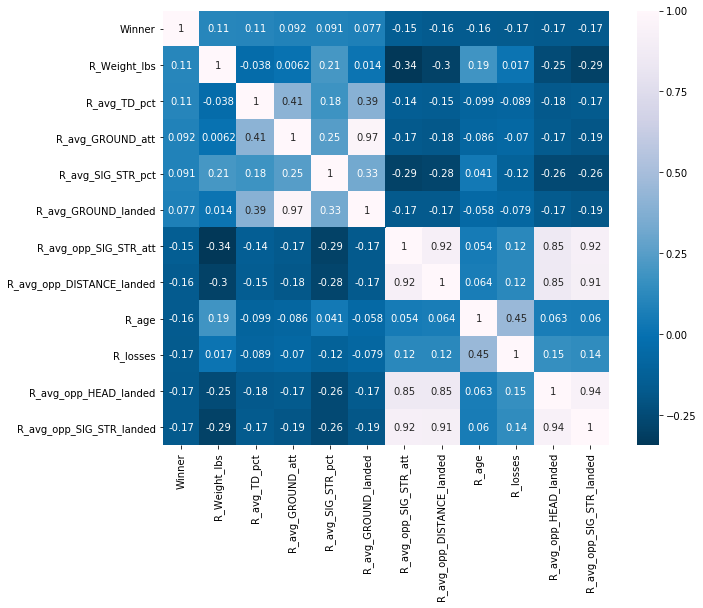

In [0]:
#plot heatmap to represent correlation to 'Winner'

plt.figure(figsize = (10,8))
sns.heatmap(rcorr[rcorr12.index].loc[rcorr12.index] , cmap = "PuBu_r", annot = True)

In [0]:
# Replace values of winner column for BLUE
breplace = {"Red": '-1', "Blue": '1', 'Draw': '0'}
blue['Winner'] = blue['Winner'].replace(breplace).astype('int')

In [0]:
# Create new dataframe with only technical stats by extraction from the blue dataframe.  
blue_stats = blue[['Winner','B_fighter','B_current_lose_streak','B_current_win_streak','B_avg_BODY_att','B_avg_BODY_landed','B_avg_CLINCH_att','B_avg_CLINCH_landed','B_avg_DISTANCE_att','B_avg_DISTANCE_landed','B_avg_GROUND_att','B_avg_GROUND_landed','B_avg_HEAD_att','B_avg_HEAD_landed','B_avg_KD','B_avg_LEG_att','B_avg_LEG_landed','B_avg_PASS','B_avg_REV','B_avg_SIG_STR_att','B_avg_SIG_STR_landed','B_avg_SIG_STR_pct','B_avg_SUB_ATT','B_avg_TD_att','B_avg_TD_landed','B_avg_TD_pct','B_avg_TOTAL_STR_att','B_avg_TOTAL_STR_landed','B_longest_win_streak','B_losses','B_avg_opp_BODY_att','B_avg_opp_BODY_landed','B_avg_opp_CLINCH_att','B_avg_opp_CLINCH_landed','B_avg_opp_DISTANCE_att','B_avg_opp_DISTANCE_landed','B_avg_opp_GROUND_att','B_avg_opp_GROUND_landed','B_avg_opp_HEAD_att','B_avg_opp_HEAD_landed','B_avg_opp_KD','B_avg_opp_LEG_att','B_avg_opp_LEG_landed','B_avg_opp_PASS','B_avg_opp_REV','B_avg_opp_SIG_STR_att','B_avg_opp_SIG_STR_landed','B_avg_opp_SIG_STR_pct','B_avg_opp_SUB_ATT','B_avg_opp_TD_att','B_avg_opp_TD_landed','B_avg_opp_TD_pct','B_avg_opp_TOTAL_STR_att','B_avg_opp_TOTAL_STR_landed','B_total_rounds_fought','B_total_time_fought(seconds)','B_total_title_bouts','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage','B_wins','B_Stance','B_Height_cms','B_Reach_cms','B_Weight_lbs','B_age']]
blue_stats.shape

(5144, 69)

In [0]:
# Calculate correlation (top 6 & bottom 6) and append them together in a single Series. 

bcorr = blue_stats.corr()

btop6 = bcorr[['Winner']].sort_values(by = 'Winner', ascending = False)[:6]
bbottom6 = bcorr[['Winner']].sort_values(by = 'Winner', ascending = False)[-6:]
bcorr12 = btop6.append(bbottom6)

In [0]:
# Check Series, ignore 'Winner' with corr = 1
bcorr12

,Winner
Winner,1.000000
B_avg_SIG_STR_att,0.161142
B_avg_DISTANCE_att,0.159923
B_avg_DISTANCE_landed,0.158696
B_avg_SIG_STR_landed,0.157491
B_avg_HEAD_att,0.152896
B_avg_opp_GROUND_landed,-0.051379
B_total_title_bouts,-0.055138
B_age,-0.058414
B_avg_opp_GROUND_att,-0.061891


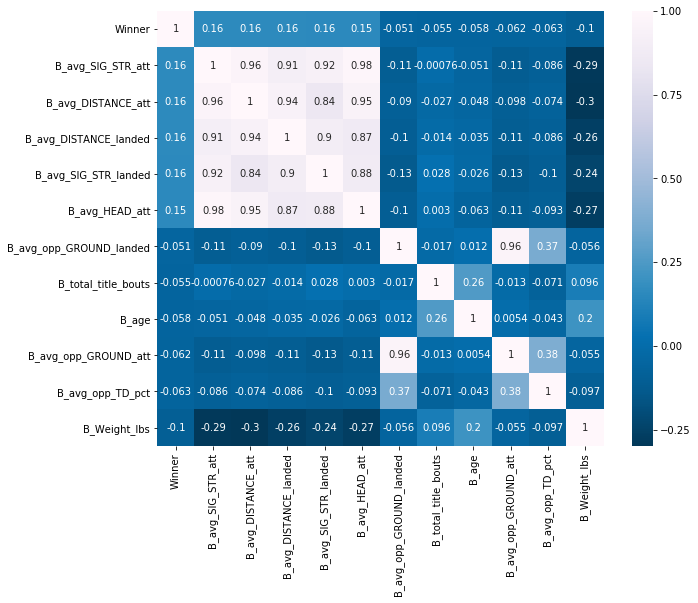

In [0]:
plt.figure(figsize = (10,8))
sns.heatmap(bcorr[bcorr12.index].loc[bcorr12.index] , cmap = "PuBu_r", annot = True)

# <font color = red > Sum</font><font color = blue >mary </font>

UFC is a _highly unpredictable_ sports. Given the time & tools at our disposal, we have arrived at the following insights from our dataset which might help a viewer to place a better bet: 

1. <font color = red> Red </font> Corner tends to win more than <font color = blue> Blue </font>. 


2. Across all ```Weight Classes```, <font color = red> Red </font> wins more than <font color = blue> Blue </font>. However, the disparities vary. For example, in **Open Weight**, there is almost **0** chance that the Blue fighter will emerge victorious. Alternatively, in **Bantam Weight**, the chances of either fighter to be victorious are about the same.

 
3. The most successful ```age``` range </font> of UFC fighters are between 27 - 31. We can utilize this to compare fighters if they are not in the same age group. 


4. The ```popularity``` of UFC is increasing, which implies that there our target audience group may be growing.



5. Across all ```locations``` where fights are held, the possibility of <font color = red> Red </font> winning the fight over <font color = blue> Blue </font> is always higher. However, disparity varies. For instance, for fights in the USA, <font color = red> Red </font> wins over <font color = blue> Blue </font> most of the time. On the other hand, fights in Australia see about the same chances of <font color = red> Red </font> & <font color = blue> Blue </font> emerging victorious. 


 
6. ```Technical Stats```: We selected the top 6 stats that are highly correlated to the win rate (positively & negatively) and use them in the same criteria to increase the weight. We'd like to use this group of technical stats collectively to make predictions about any two fighters. 

# Thank you :)